<a href="https://colab.research.google.com/github/sunnatillo91/ai-datascience/blob/main/_4DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Data Science va Sun'iy Intellekt Praktikum

## 6-MODUL. Deep Learning

## lV-qism

### Deep Learning negizida nima turibdi

##Kutubxonalarni o'rnatib olamiz
### Bizga kerak bo'ladi
- `fastai==2.7.15` versiyasi
- `torch==2.3.0+cu121` versiyasi

In [1]:
# Kutubxonalarni yuklab olish
import torch
import fastai
# !pip install fastai==2.7.15  kerakli versiyani o'rnatish yangi versiya o'rnatgandan keyin restart runtime qilish kerak bo'ladi

# versiyalarni tekshirish
print(torch.__version__)
print(fastai.__version__)

2.3.0+cu121
2.7.15


## `3` yoki `7`

### MNIST datasetidagi 3 va 7 sonlarini ajratib olingan datasetni yuklab olamiz

In [2]:
from fastai.vision.all import *

# path
path = untar_data(URLs.MNIST_SAMPLE)

# path.ls()

threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()

In [3]:
im3_sample = threes[8]
im3 = Image.open(im3_sample)
im3

In [4]:
im7_sample = sevens[8]
im7 = Image.open(im7_sample)
im7

In [5]:
array(im3)[4:10, 4:10]  # kompyuter vizual sonlarni piksellar yordamida raqamlar ko'rinishida taniydi

array([[  0,   0,   0,   0,   0,  51],
       [  0,   0,   0,   0,   0, 238],
       [  0,   0,   0,   0,   0, 253],
       [  0,   0,   0,   0,   0, 146],
       [  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0]], dtype=uint8)

## Torch tensorni afzalligi bundagi sonlarni hisoblashda GPU dan foydalanish mumkin. numpy arrayni esa va CPU lar yordamida hisoblash mumkin

In [6]:
tensor(im3)[4:10, 4:10]

tensor([[  0,   0,   0,   0,   0,  51],
        [  0,   0,   0,   0,   0, 238],
        [  0,   0,   0,   0,   0, 253],
        [  0,   0,   0,   0,   0, 146],
        [  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0]], dtype=torch.uint8)

In [7]:
import pandas as pd

im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:22, 4:22])
df.style.set_properties(**{"font-size":'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,51,159,253,253,253,255,253,253,159,113,0,0,0
1,0,0,0,0,0,238,252,252,252,252,253,252,252,252,252,163,134,0
2,0,0,0,0,0,253,233,195,102,55,56,103,195,233,252,253,167,0
3,0,0,0,0,0,146,148,0,0,0,0,0,0,169,252,253,167,0
4,0,0,0,0,0,0,0,0,0,0,0,0,32,215,252,253,89,0
5,0,0,0,0,0,0,0,0,0,0,0,38,222,253,253,204,15,0
6,0,0,0,0,0,0,0,0,0,0,147,234,252,252,204,15,0,0
7,0,0,0,0,0,0,19,57,57,135,253,252,252,120,25,0,0,0
8,0,0,0,0,0,92,196,252,252,252,253,252,252,99,0,0,0,0
9,0,0,0,0,0,253,252,252,252,252,253,252,252,239,140,0,79,0


In [8]:
three_tensors = [tensor(Image.open(i)) for i in threes]  #arraylarni tensorga o'tkazib olamiz
seven_tensors = [tensor(Image.open(i)) for i in sevens]
len(three_tensors), len(seven_tensors)

(6131, 6265)

<Axes: >

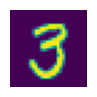

In [9]:
show_image(three_tensors[2])

In [10]:
stacked_threes = torch.stack(three_tensors).float()/255
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_sevens.shape

torch.Size([6265, 28, 28])

## Ideal 3 va ideal 7 ni o'rtacha qiymatlarni hisoblash orqali topish

<Axes: >

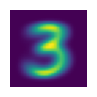

In [11]:
mean3 = stacked_threes.mean(0)
show_image(mean3)

<Axes: >

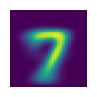

In [12]:
mean7 = stacked_sevens.mean(0)
show_image(mean7)

## Xatoliklarni o'lchash
- Mean absolute error `MAE` yoki `L1 norm`
- Root Mean Squared Error `RMSE` yoki `L2 norm`

<Axes: >

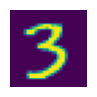

In [13]:
s_3 = stacked_threes[1]
show_image(s_3)

In [14]:
""" MAE va RMSE yordamida s_3 sample bilan ideal '3' orasidagi xatolik"""
# MAE
mae = (s_3-mean3).abs().mean()

# RMSE
mse = ((s_3-mean3)**2).mean().sqrt()

mae, mse

(tensor(0.1114), tensor(0.2021))

In [15]:
""" MAE va RMSE yordamida s_3 sample bilan ideal '7' orasidagi xatolik"""

# MAE
mae = (s_3-mean7).abs().mean()

# RMSE
mse = ((s_3-mean7)**2).mean().sqrt()

mae, mse

(tensor(0.1586), tensor(0.3021))

## list, array, tensor

In [16]:
from fastai.vision.all import *

data = [[1,2,3], [4,5,6]]  #nested list
arr = array(data)  # numpy array
tns = tensor(data)  # #torch tensor

In [17]:
data

[[1, 2, 3], [4, 5, 6]]

In [18]:
arr

array([[1, 2, 3],
       [4, 5, 6]])

In [19]:
tns

tensor([[1, 2, 3],
        [4, 5, 6]])

## Model aniqligini broadcasting orqali aniqlash

In [20]:
valid_3_tensors = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'3').ls()])
valid_3_tensors = valid_3_tensors.float()/255

valid_7_tensors = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'7').ls()])
valid_7_tensors = valid_7_tensors.float()/255

valid_3_tensors.shape, valid_7_tensors.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

## MAE ni hisoblashni funksiyaga aylantiramiz

In [22]:
# mae xatolik funksiyasi
def mae(a, b):
  return (a-b).abs().mean((-1,-2))

# tekshirish
valid_3_error = mae(valid_3_tensors, mean3)
valid_7_error = mae(valid_7_tensors, mean3)

print(valid_3_error, valid_7_error, valid_3_error.shape)

tensor([0.1622, 0.1304, 0.1032,  ..., 0.1142, 0.1164, 0.1297]) tensor([0.1711, 0.1582, 0.1363,  ..., 0.1503, 0.1445, 0.1471]) torch.Size([1010])


## Natijalovchi funksiya

In [23]:
def is_3(x):
  return mae(x, mean3) < mae(x, mean7)

def is_7(x):
  return mae(x, mean7) < mae(x, mean3)

In [25]:
is_3(s_3), is_3(s_3).float()

(tensor(True), tensor(1.))

In [27]:
accuracy_3s = is_3(valid_3_tensors).float().mean()
accuracy_7s = is_7(valid_7_tensors).float().mean()

accuracy_3s, accuracy_7s, (accuracy_3s+accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))